In [1]:
%matplotlib notebook
from EIANN import *
from EIANN_utils import *
import matplotlib.pyplot as plt

In [2]:
input_size = 7
dataset = n_hot_patterns(n=2,length=input_size)
target = torch.eye(dataset.shape[0])

epochs=300
seed=42

Backprop w/static inhibition (softplus)

<IPython.core.display.Javascript object>


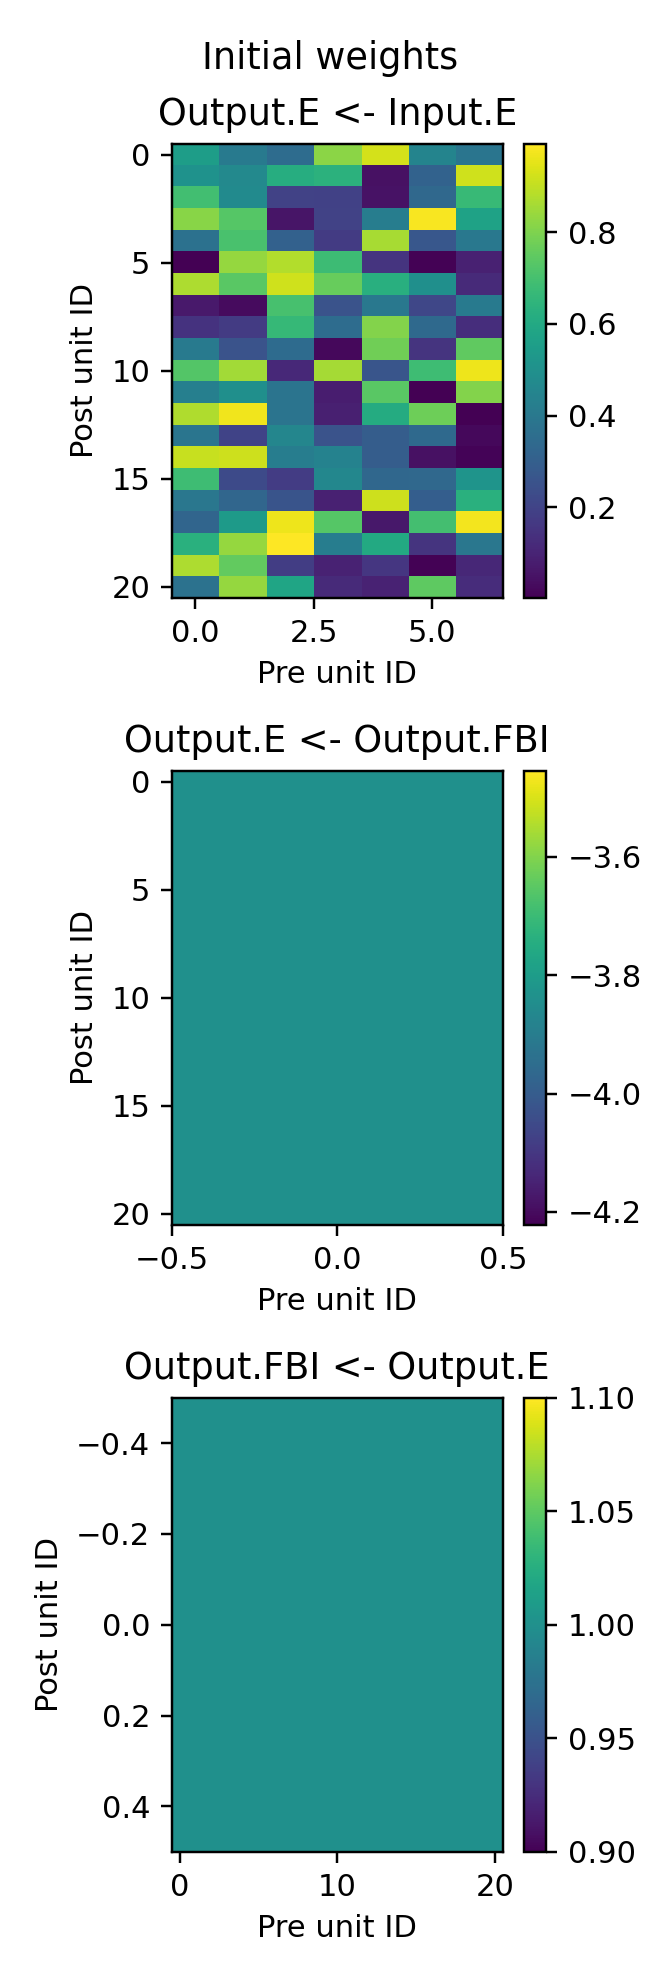

<IPython.core.display.Javascript object>


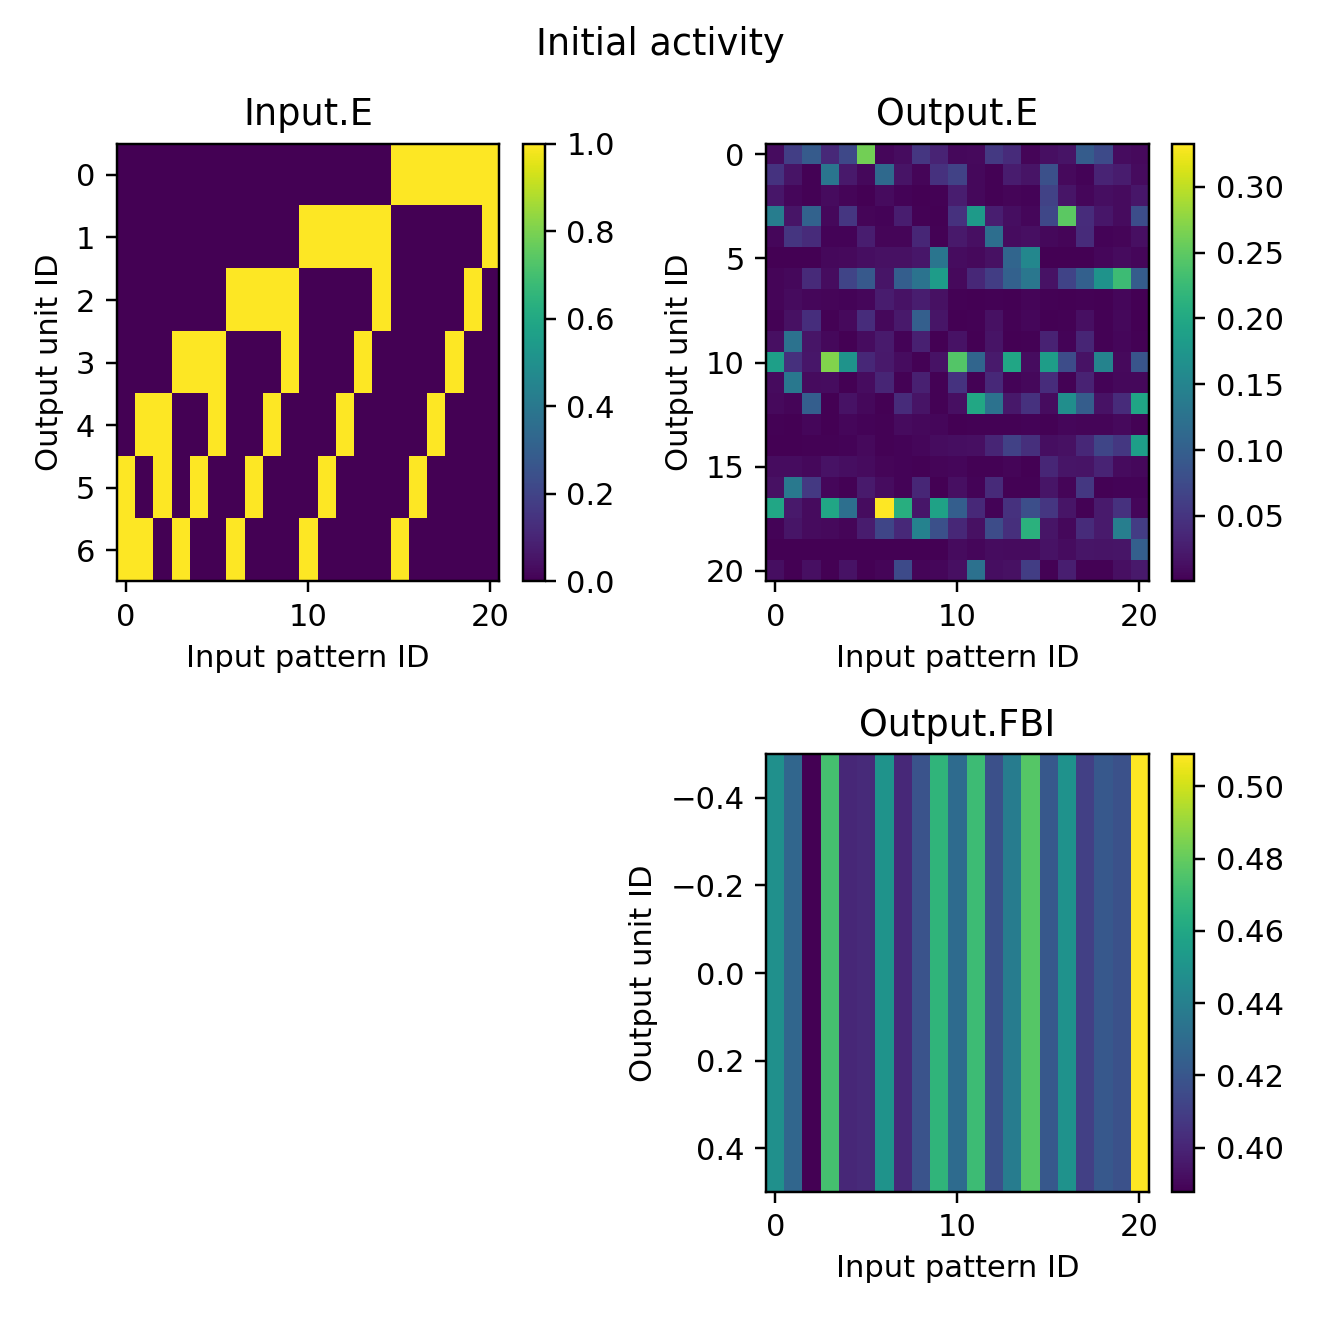

<IPython.core.display.Javascript object>


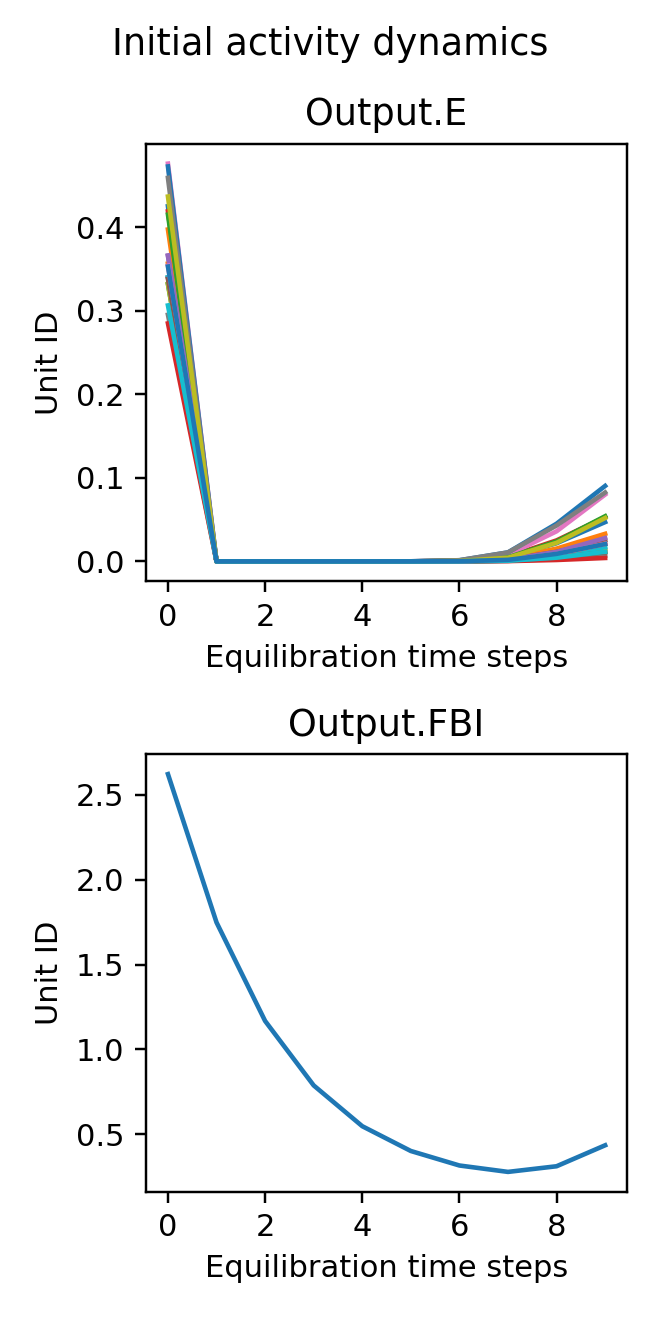

Initial population biases:
Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0.])


100%|██████████| 300/300 [00:13<00:00, 22.95it/s]


<IPython.core.display.Javascript object>


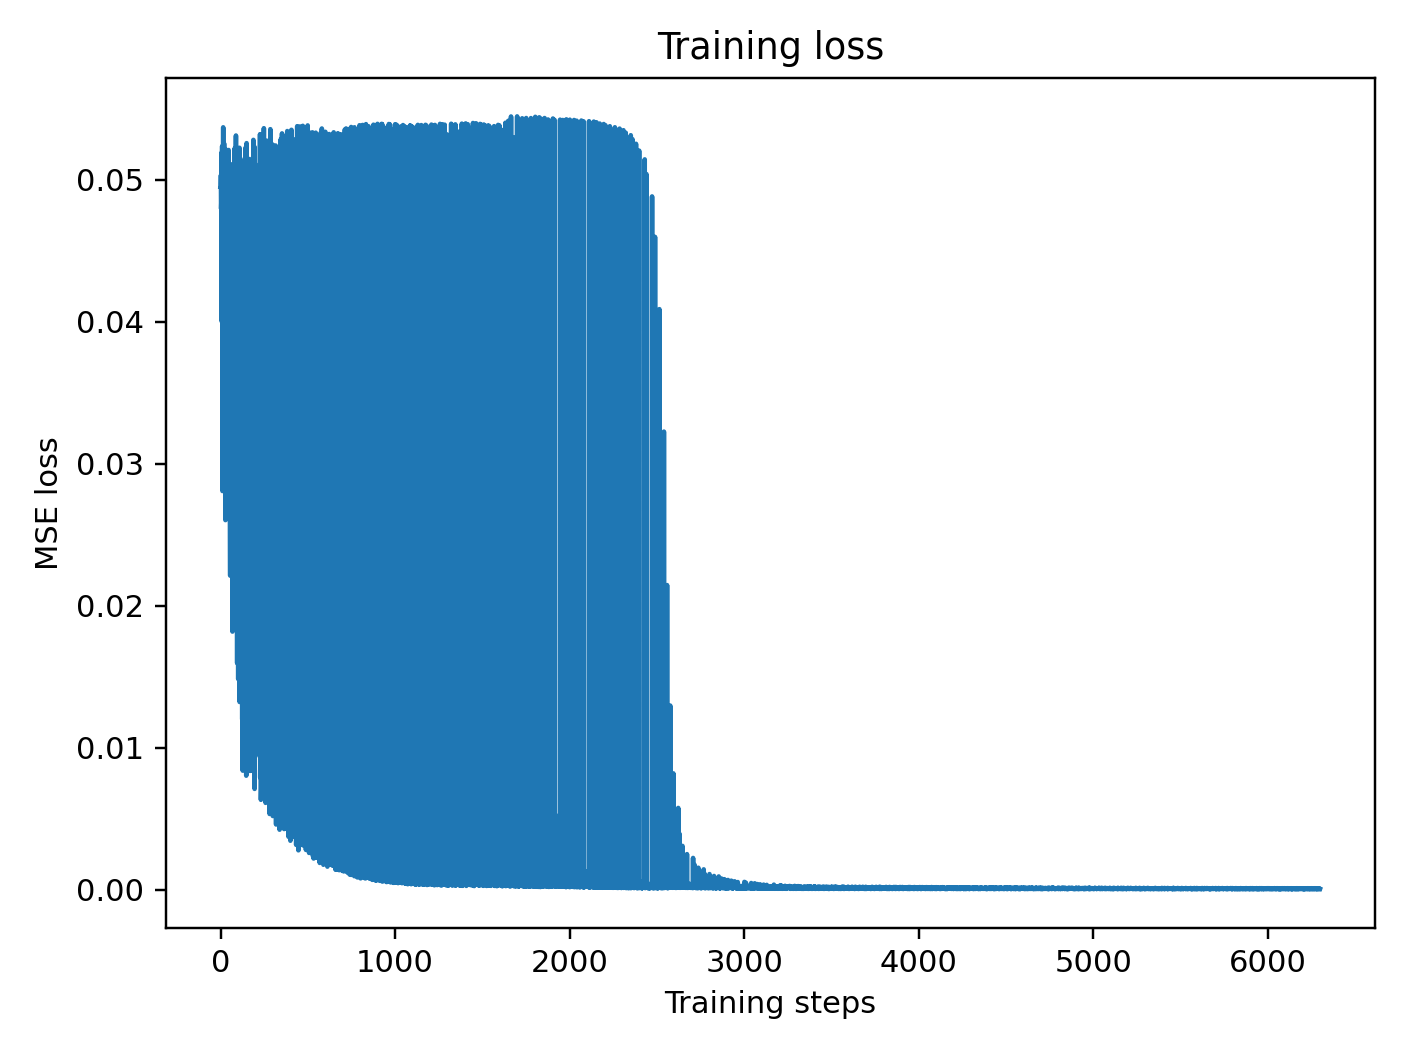

<IPython.core.display.Javascript object>


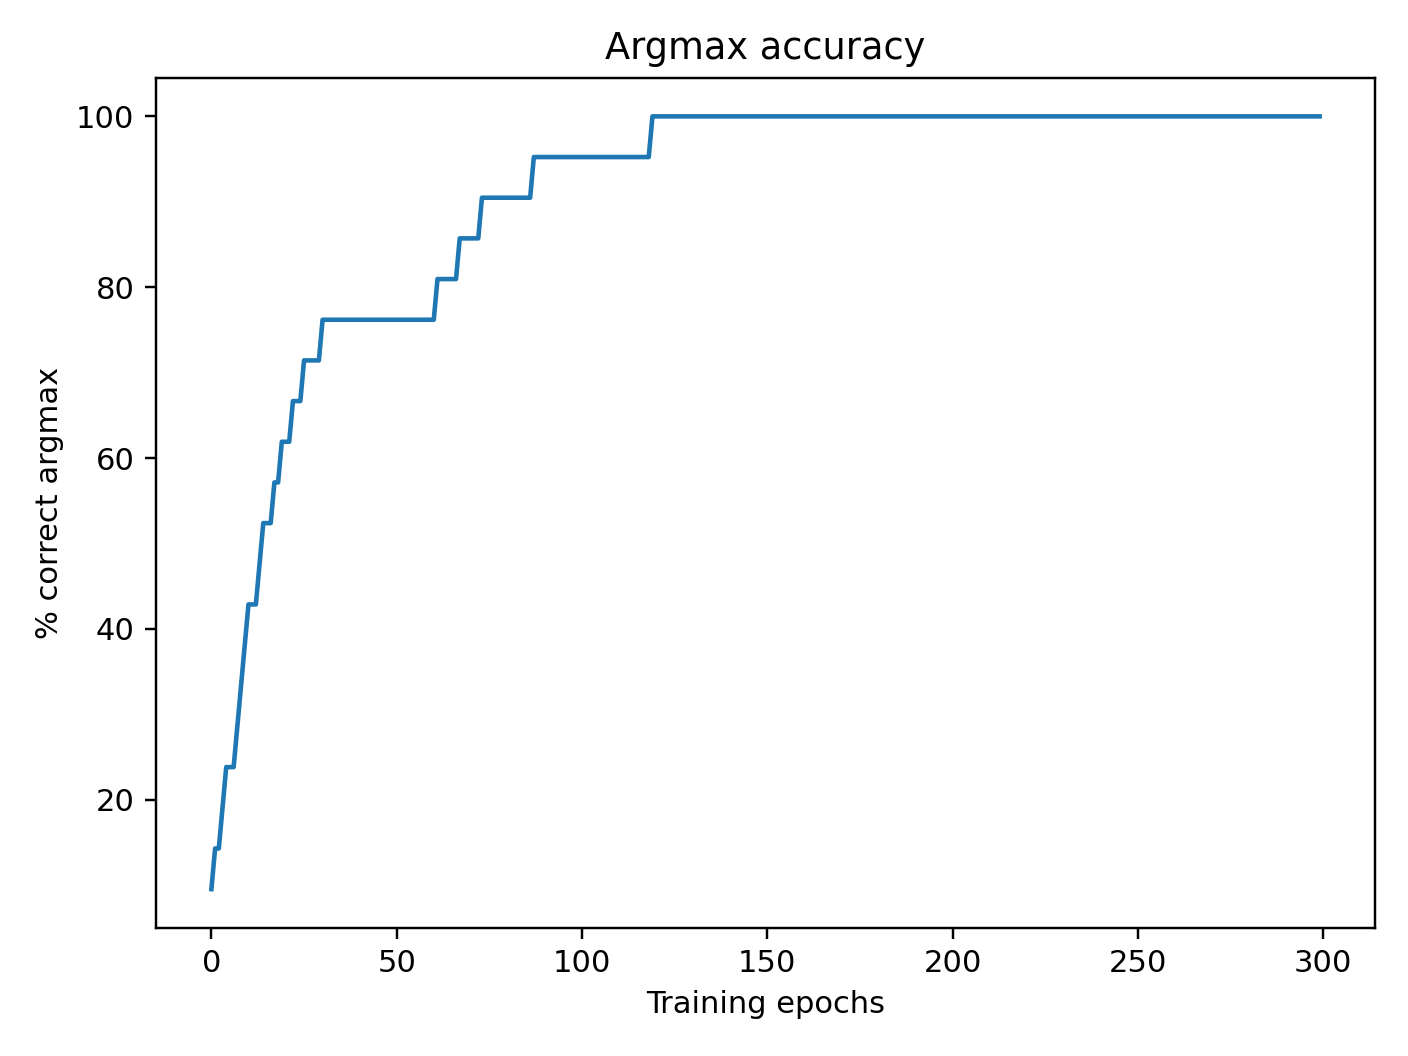

<IPython.core.display.Javascript object>


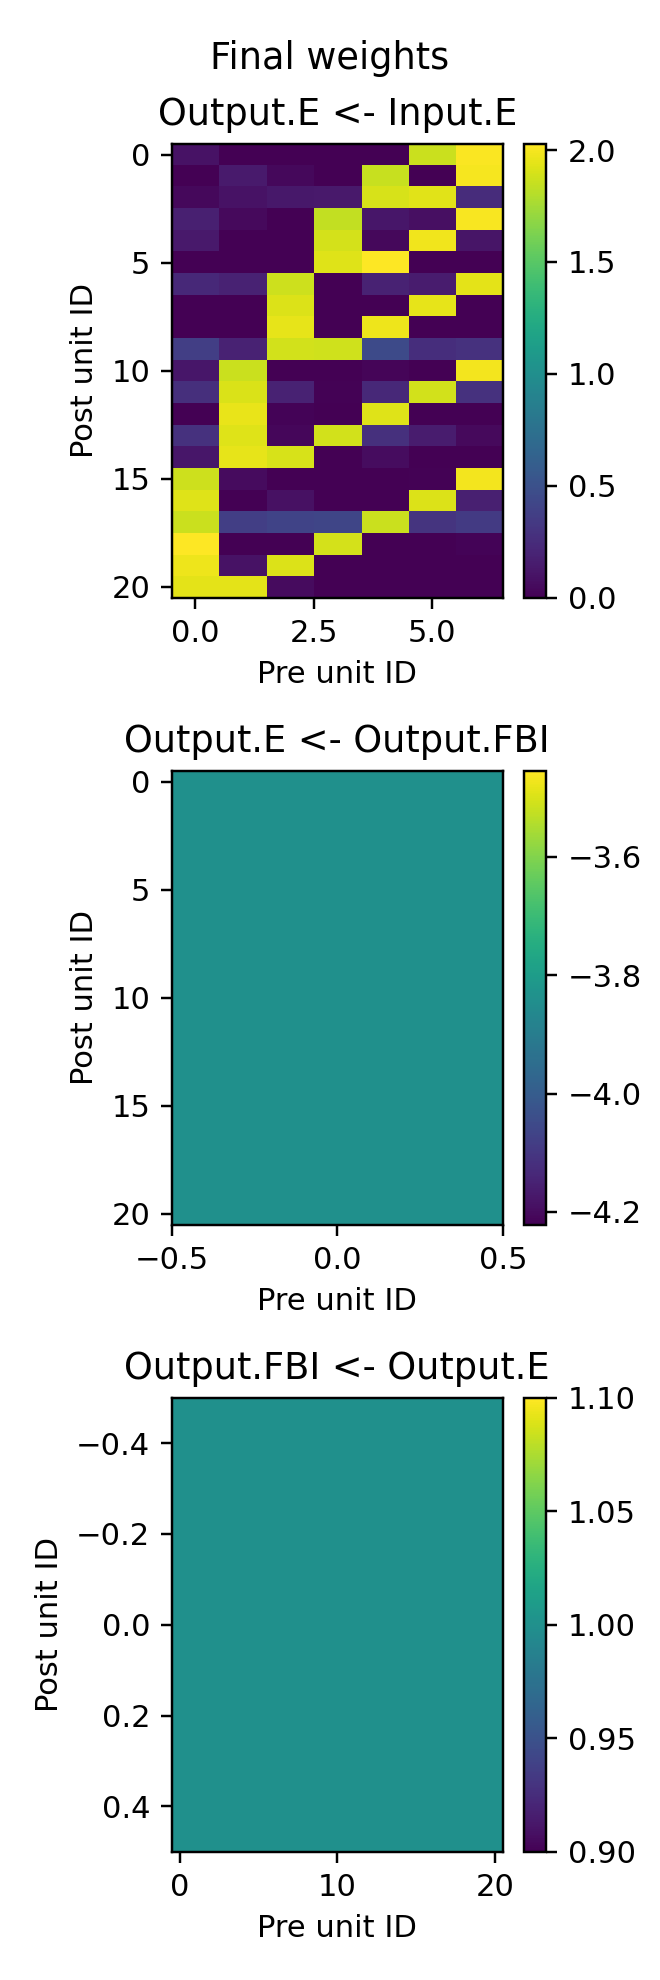

<IPython.core.display.Javascript object>


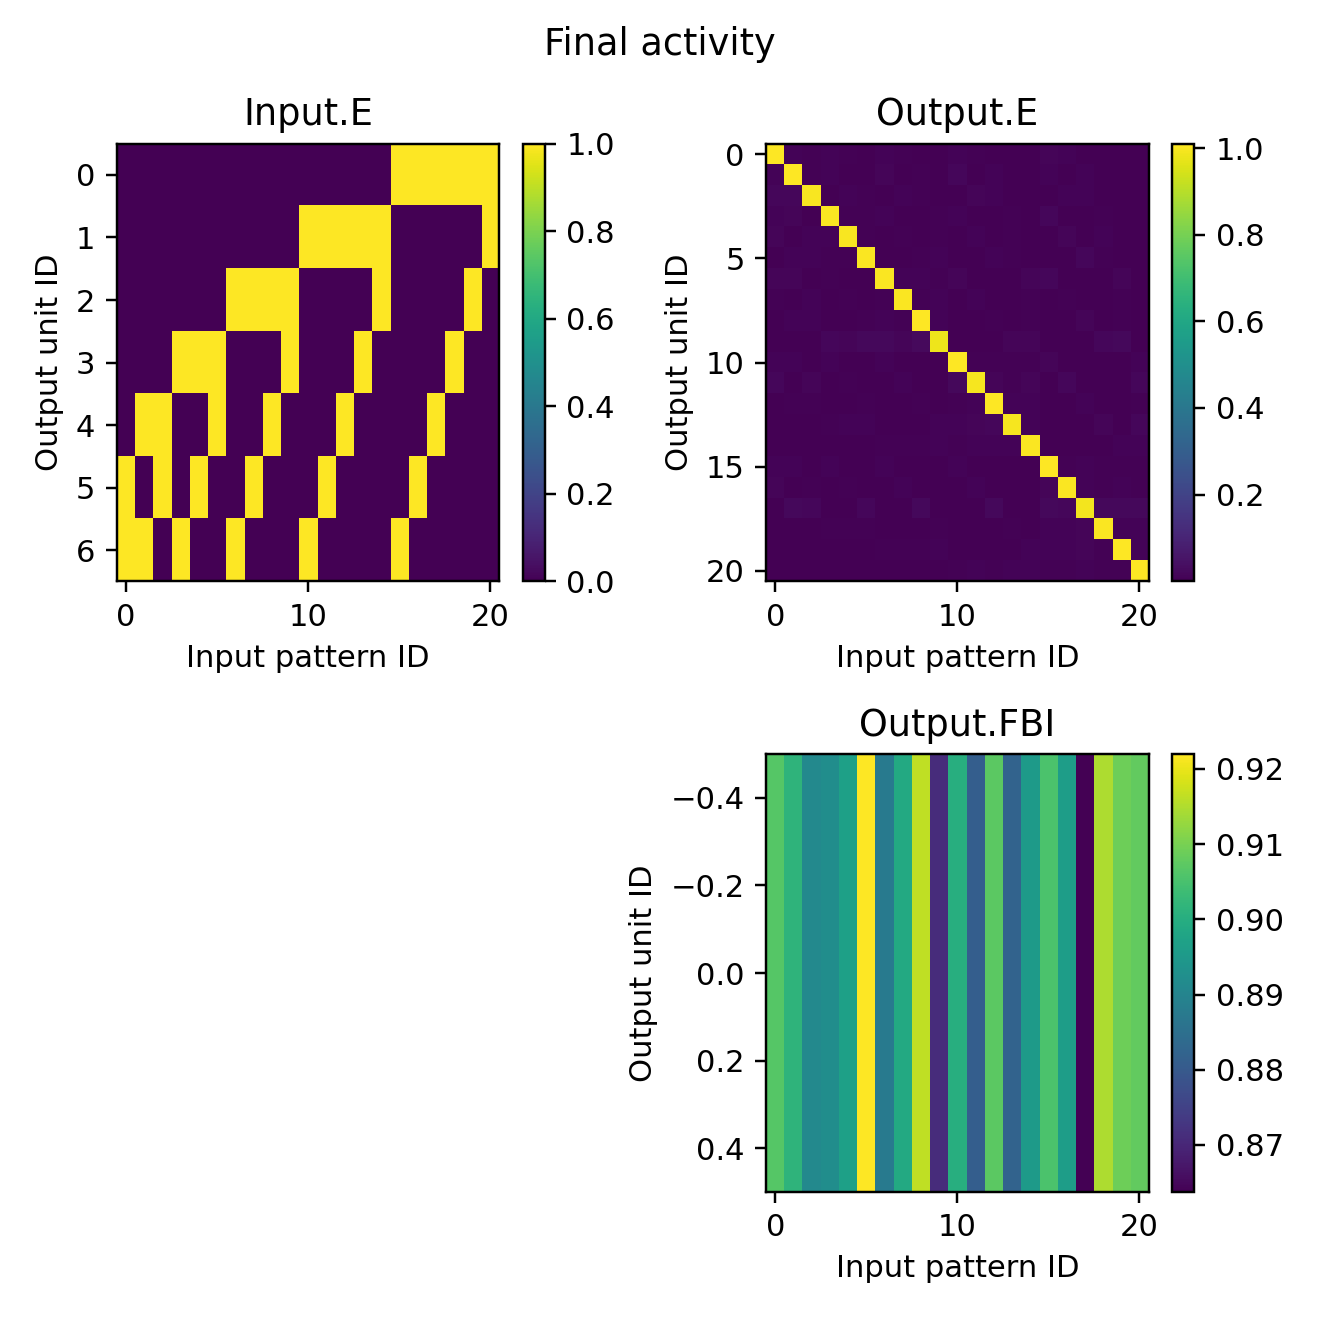

<IPython.core.display.Javascript object>


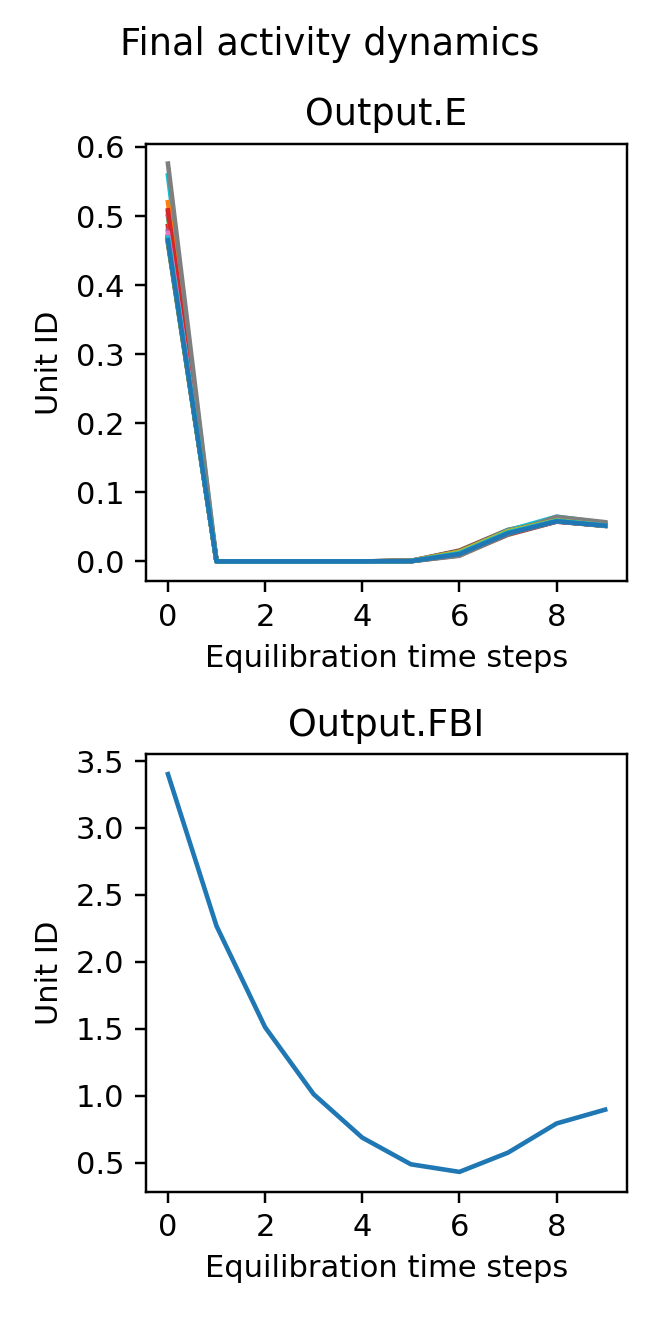

Final population biases:
Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0.])


In [3]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'softplus', 
                            'activation_kwargs': 
                                {'beta': 4.}
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'softplus', 
                            'activation_kwargs': 
                                {'beta': 4.}
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-3.838023E+00,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 10,
                         'learning_rate': 2.999993E+00
                        }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)

Examples of syntax for accessing and iterating over layers, populations, projections, and their attributes:

In [4]:
for layer in network:
    for population in layer:
        print(layer.name, population.name)
        for projection in population:
            print(layer.name, population.name, projection.pre.layer.name, projection.pre.name)

print('pre layers:', network.Output.E.projections.keys())

print(network.Output.E.Output.FBI)
for name, projection in network.Output.E.Output.items():
    print(name, projection)

Input E
Output E
Output E Input E
Output E Output FBI
Output FBI
Output FBI Output E
pre layers: dict_keys(['Input', 'Output'])
Linear(in_features=1, out_features=21, bias=False)
FBI Linear(in_features=1, out_features=21, bias=False)


Backprop w/static inhibition (relu)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu'
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-5.864659E-01,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

trainign_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 10,
                         'learning_rate': 2.882704E+00
                        }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)

Oja's rule w/static inhibition:

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu'
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Oja',
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.231289E+00,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 6.761169E-01
                        }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

BCM rule w/static inhibition (relu)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu'
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'BCM',
                                         'learning_rule_kwargs': 
                                             {'theta_init': 0.5,
                                              'theta_tau': 2.186864E+01,
                                              'k': 2.405624E-02}
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.380004E+00,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 1.132259E-01
                        }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

Gjorgieva Hebb Norm rule w/static inhibition (relu)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu'
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 2.657709E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.660024E+00,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 8.697225E-01
                        }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

Gjorgieva Hebb Norm rule w/learned inhibition (Gjorgieva Hebb Norm rule) (relu)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu'
                           },
                       'FBI': 
                            {'size': 7, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 2.392820E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 7.142411E-01
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 3.706260E+00
                                             },
                                         'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': -1,
                                              'learning_rate': 3.877354E-01
                                             }
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 8.361437E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 5.203343E-02
                                             }
                                        },
                                    'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 1.013417E-01
                                             },
                                         'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': -1,
                                              'learning_rate': 4.152069E-02
                                             }
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 8.697225E-01
                        }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

Gjorgieva Hebb Norm rule w/learned inhibition (Gjorgieva Anti-Hebb Norm rule) (relu)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu'
                           },
                       'FBI': 
                            {'size': 7, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 2.948921E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 6.539171E-01
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 6.622212E+00
                                             },
                                         'weight_bounds': (None, -0.15), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 6.768676E-03
                                             }
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 7.337564E+00
                                             },
                                         'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 2.081628E-02
                                             }
                                        },
                                    'FBI': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (-1, 0), 
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 1.000349E-01
                                             },
                                         'weight_bounds': (None, -0.15), 
                                         'direction': 'R', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': 1,
                                              'learning_rate': 2.810924E-04
                                             }
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 8.697225E-01
                        }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs, supervised=False)

BTSP rule w/static somatic inhibition (relu)

<IPython.core.display.Javascript object>


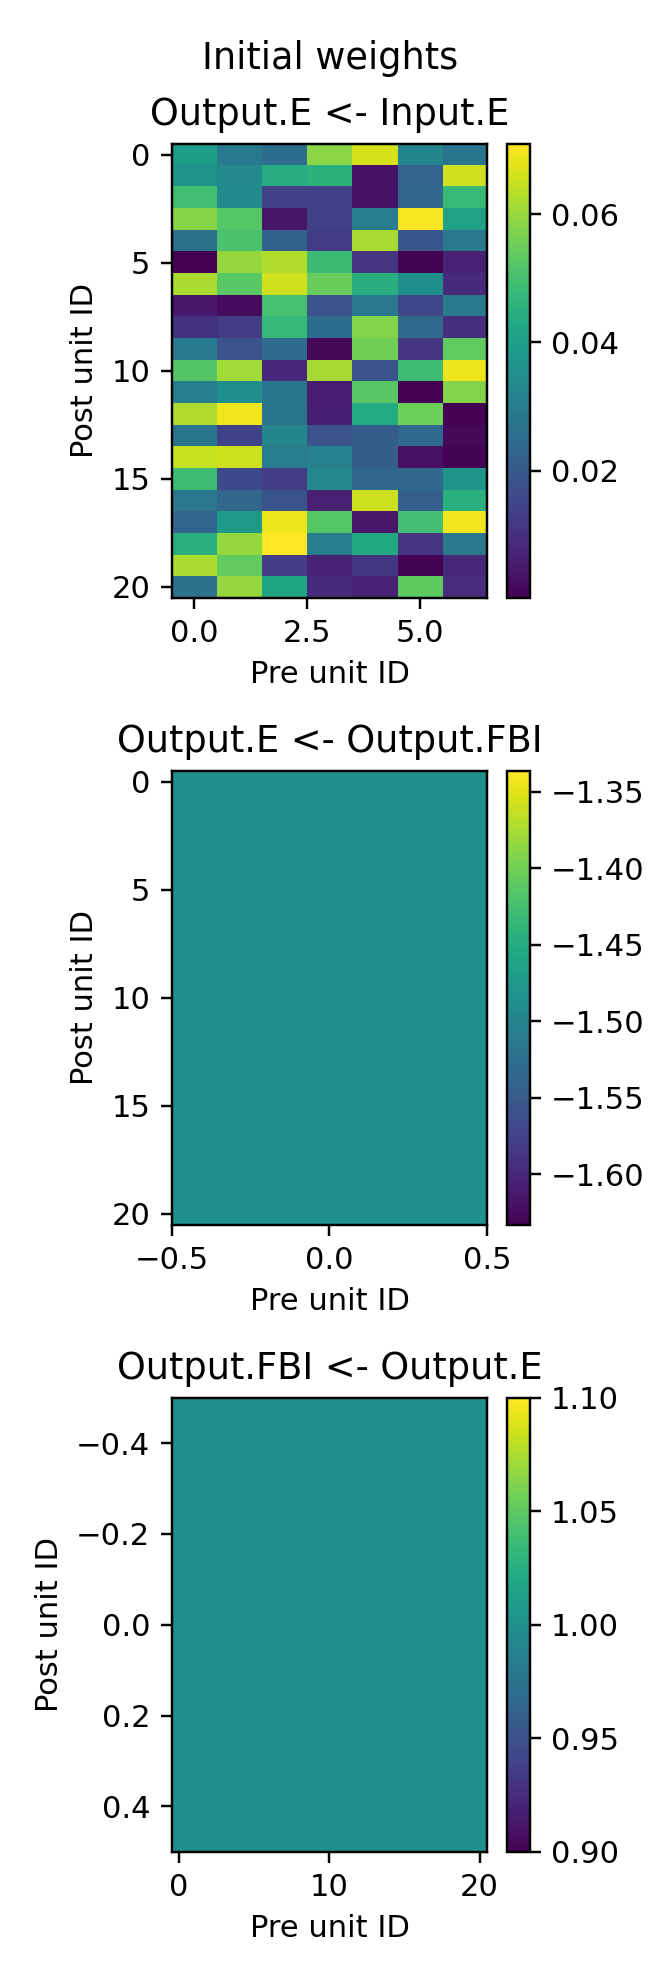

<IPython.core.display.Javascript object>


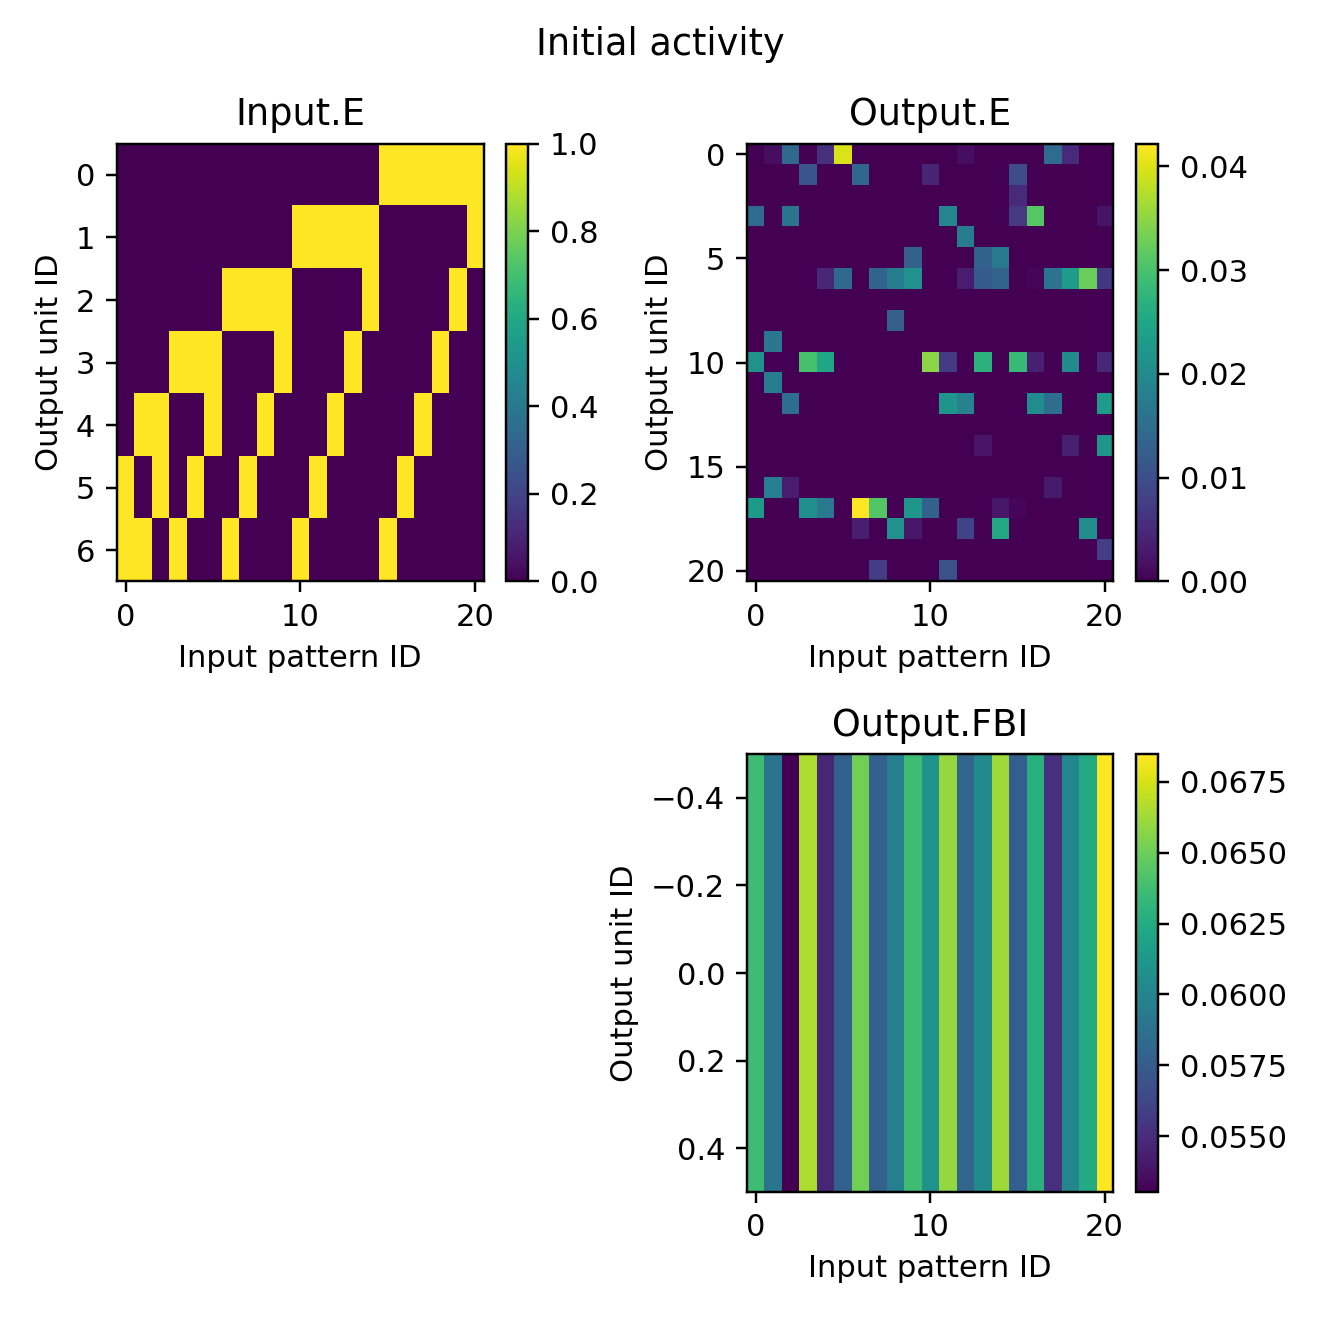

<IPython.core.display.Javascript object>


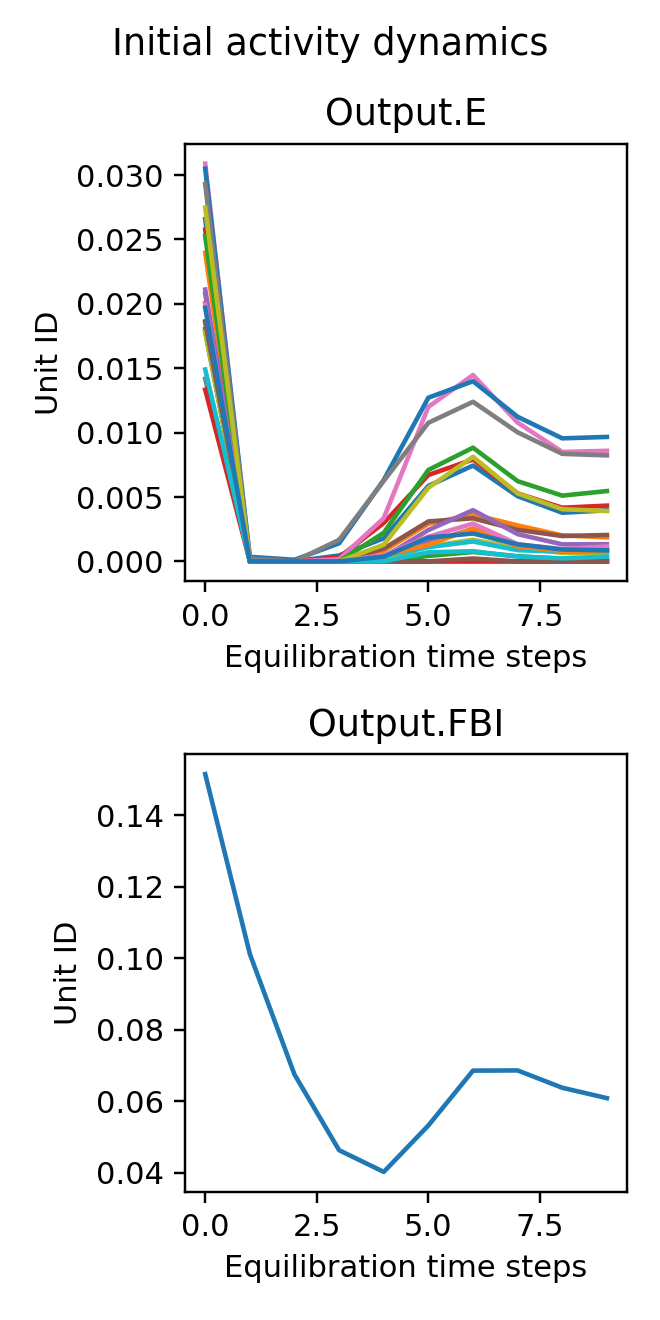

Initial population biases:
Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0.])


100%|██████████| 300/300 [00:10<00:00, 27.51it/s]


<IPython.core.display.Javascript object>


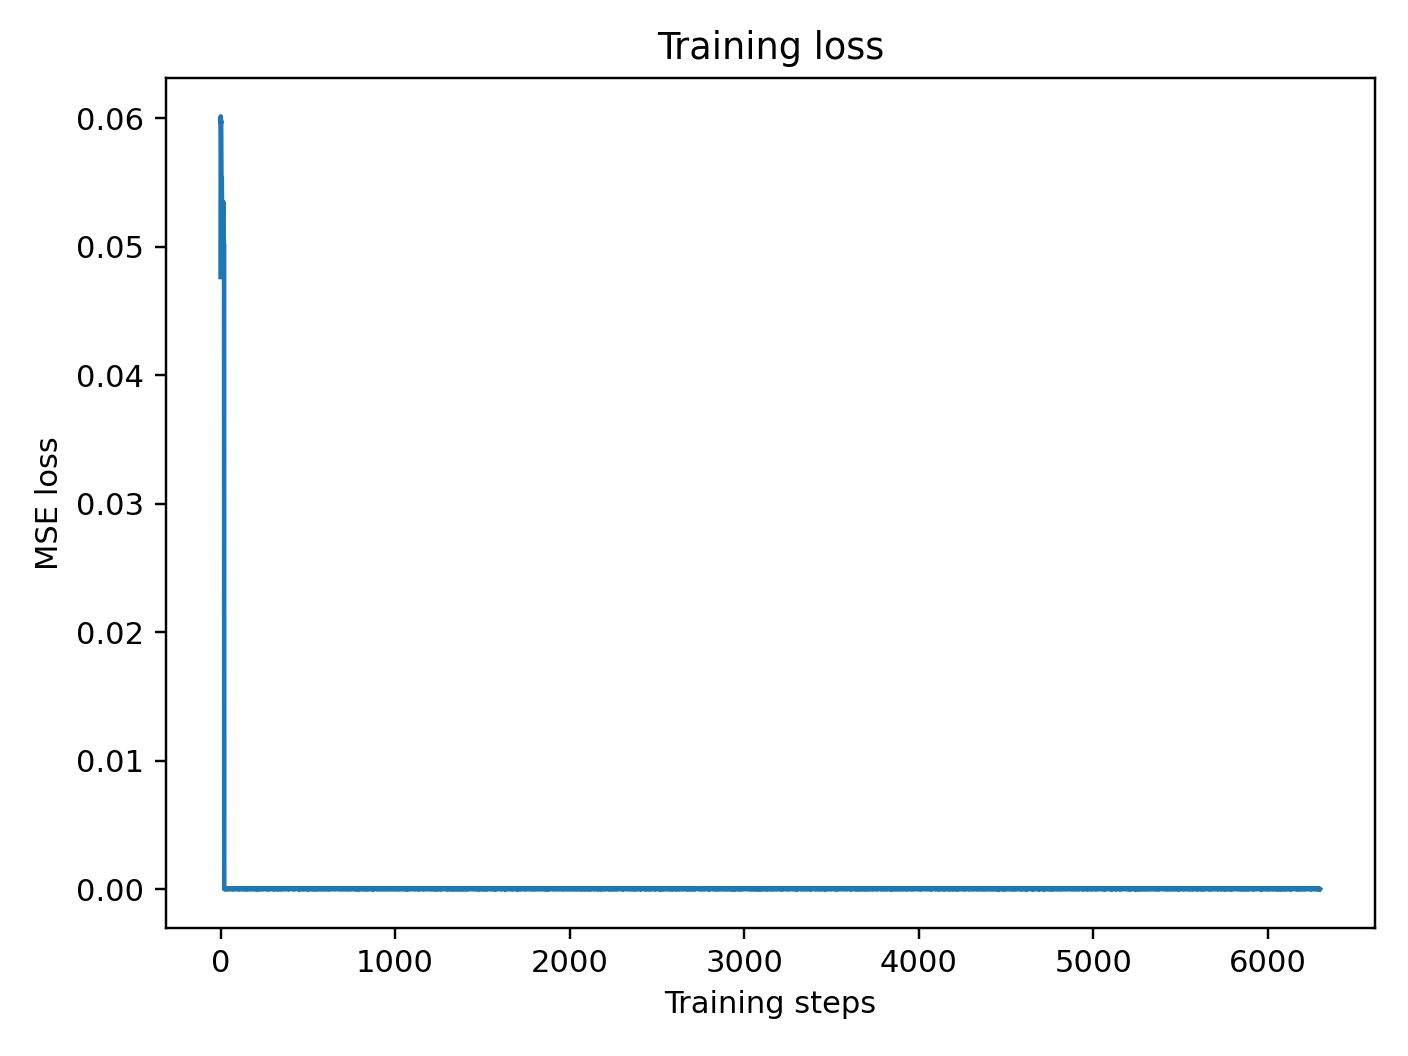

<IPython.core.display.Javascript object>


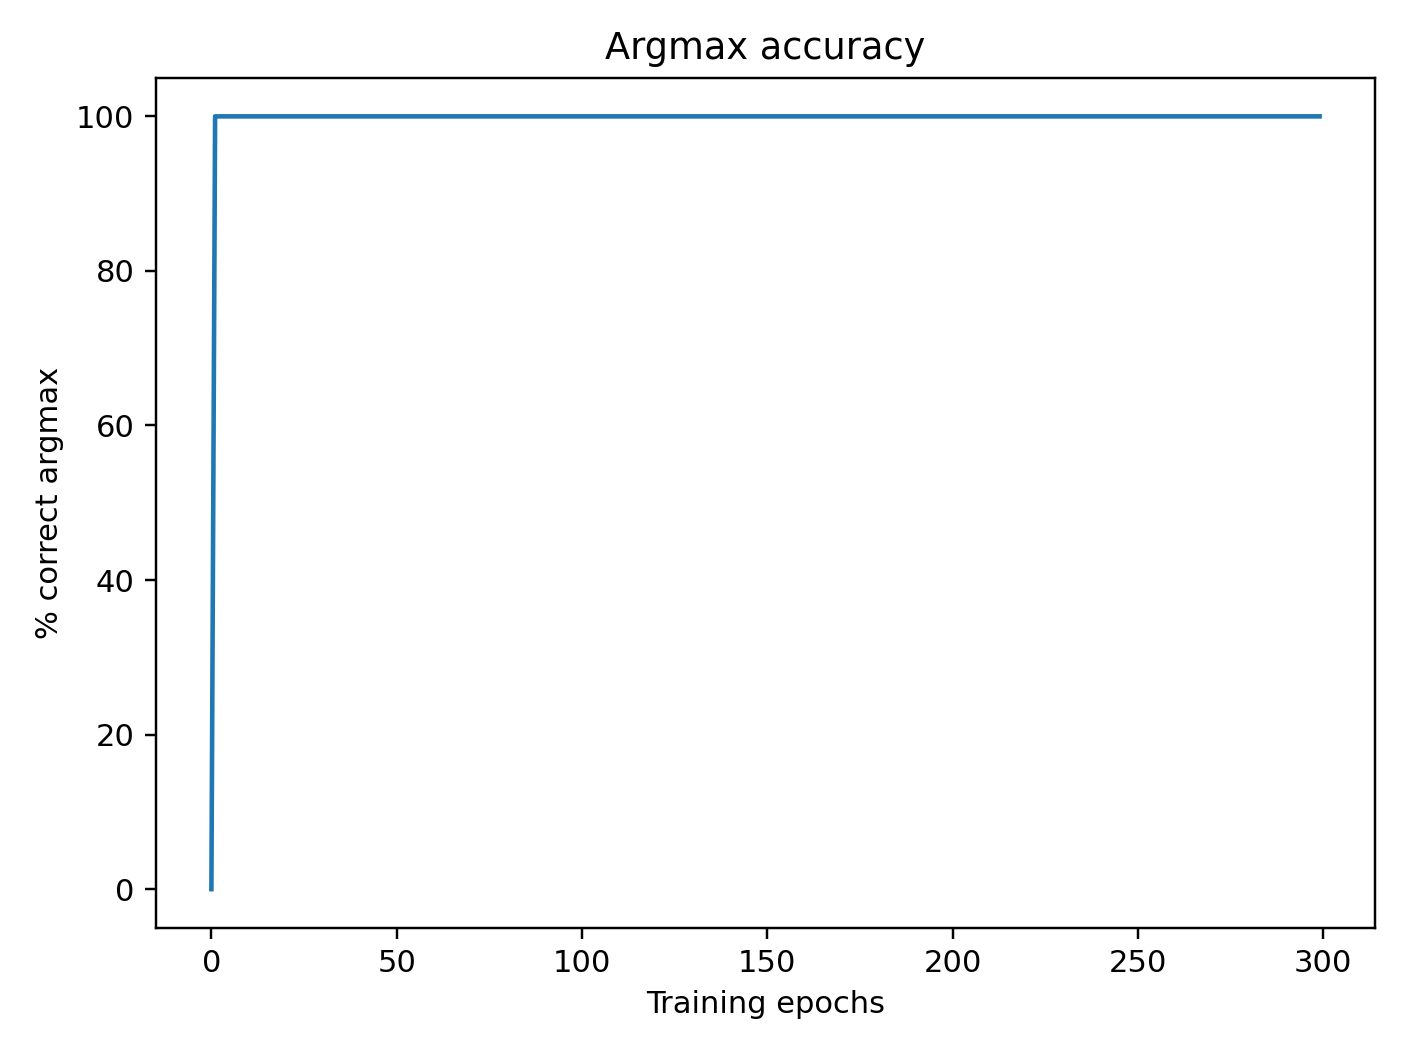

<IPython.core.display.Javascript object>


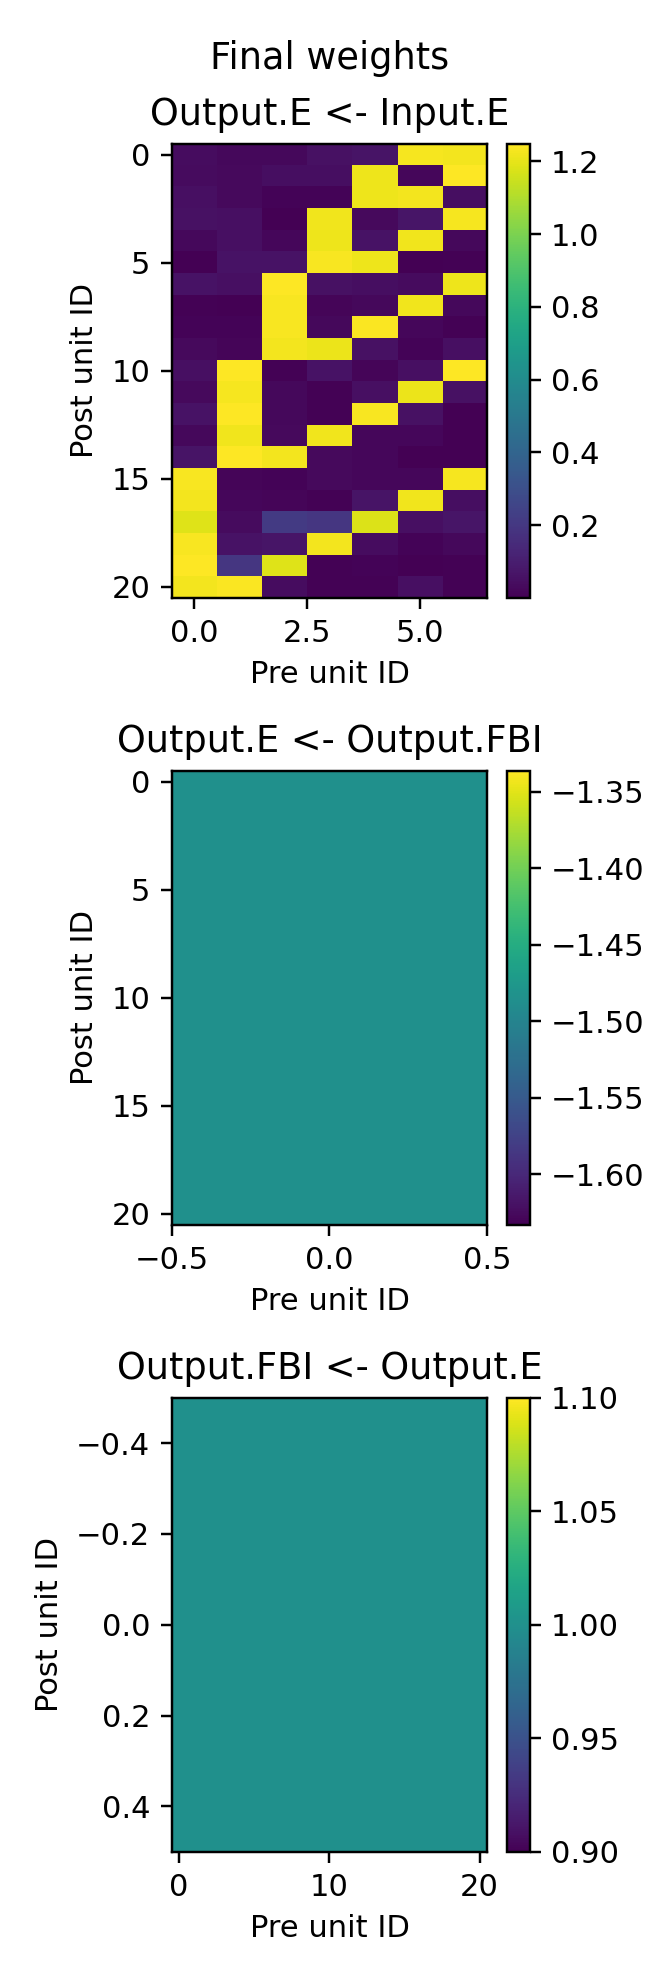

<IPython.core.display.Javascript object>


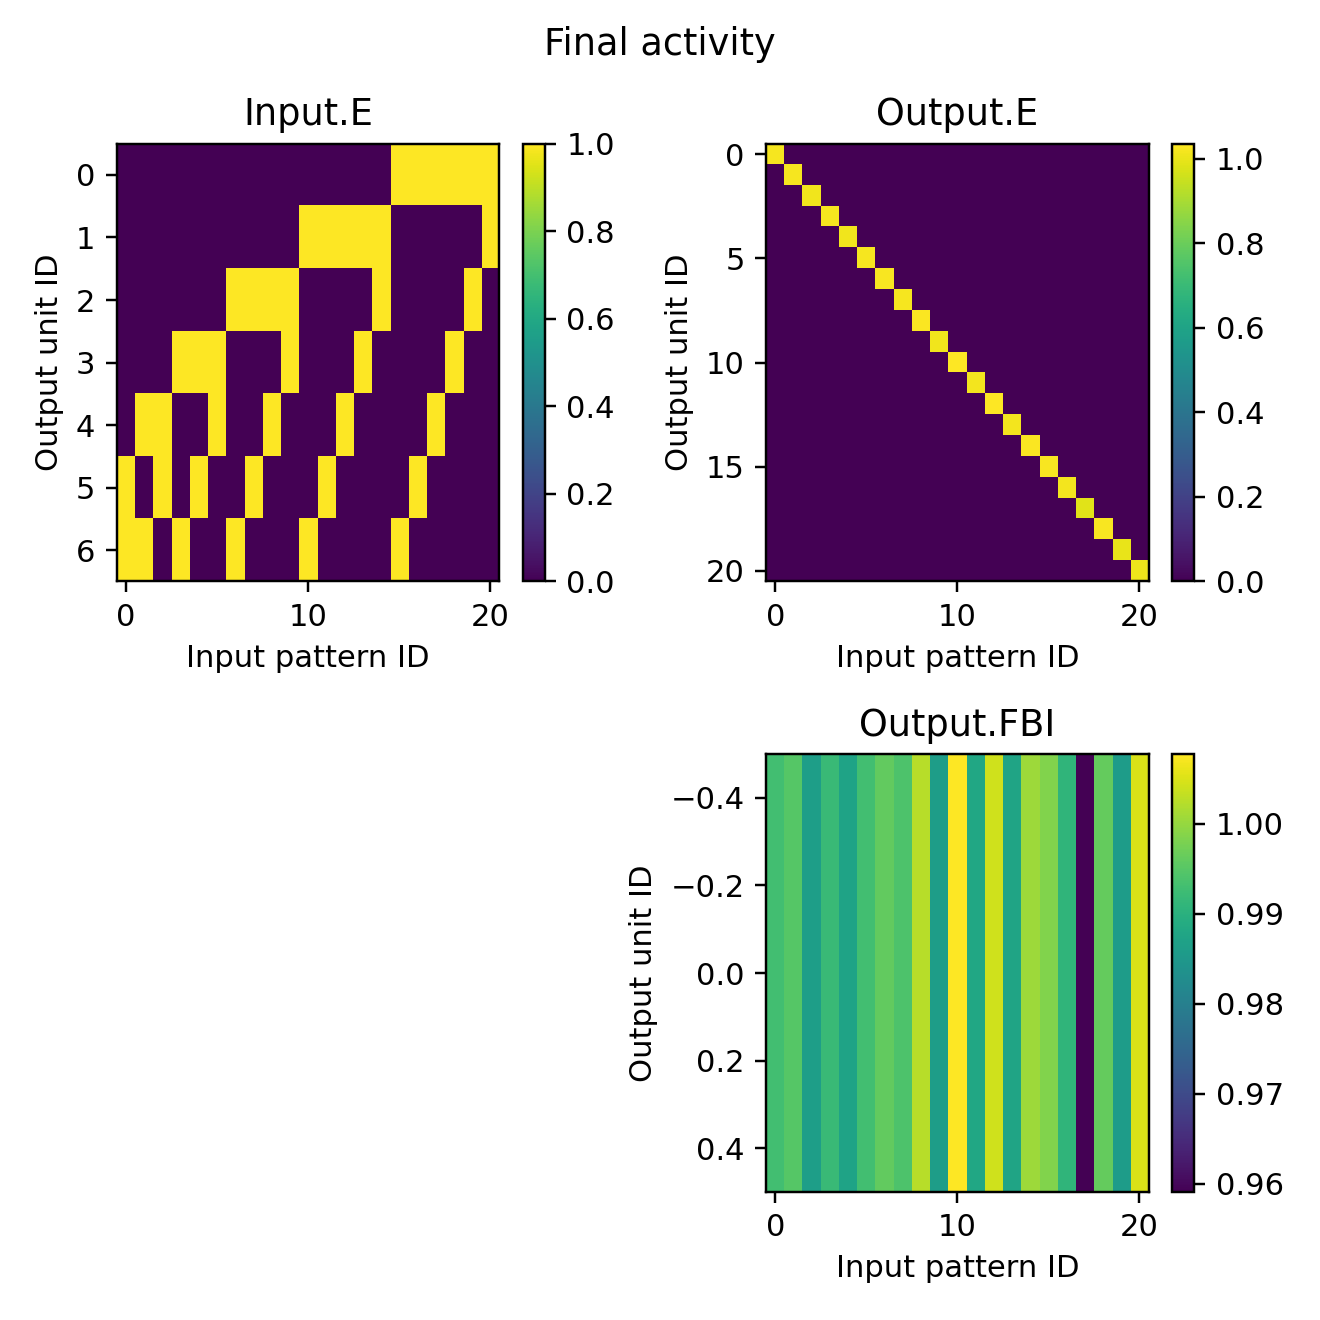

<IPython.core.display.Javascript object>


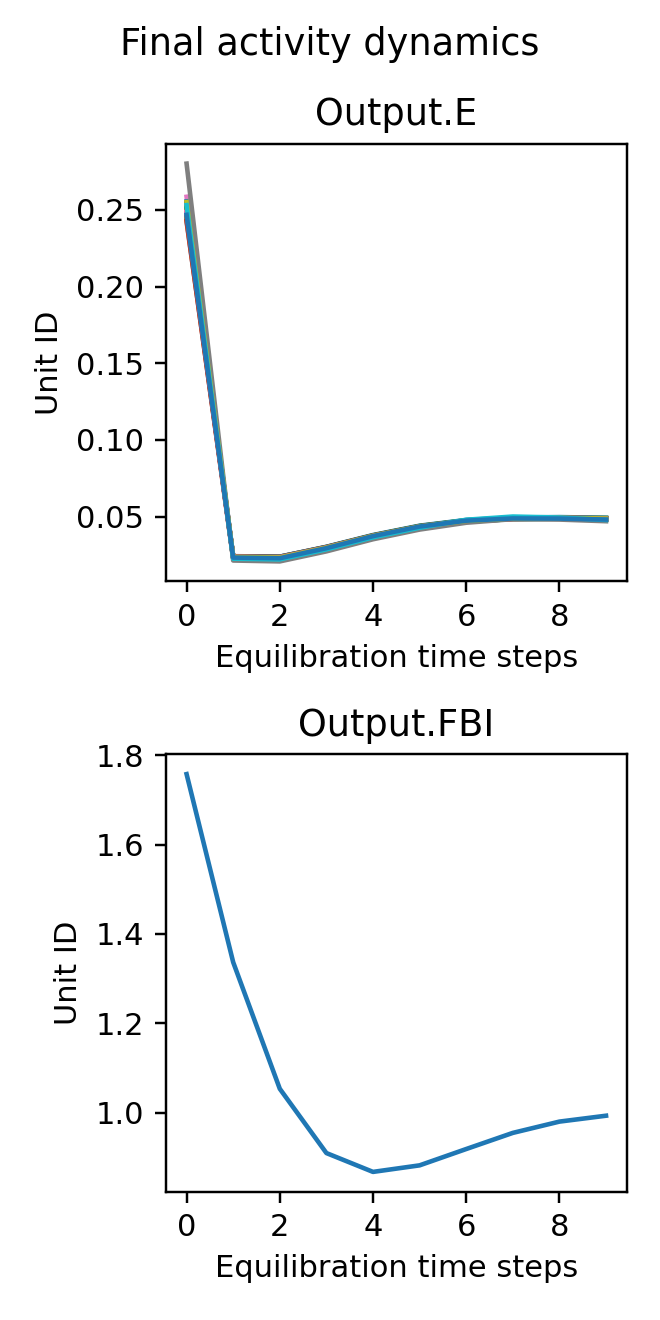

Final population biases:
Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0.])


In [5]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu'
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 0.07147848847421427), 
                                         'weight_bounds': (0, 4.998271E+00), 
                                         'direction': 'F', 
                                         'learning_rule': 'BTSP'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.484698E+00,), 
                                         'direction': 'R', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'F', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 2.426774E-01
                        }

network = EIANN(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)